In [2]:
import sys
sys.path.append('/home/lenizio/datascience/diabetes_project')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import models 
import seaborn as sns 
from models import multiple_linear_model as mult_lin
from models import logistic_regression as logistic
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, confusion_matrix




In [3]:
creditscore = pd.read_csv(r'/home/lenizio/datascience/diabetes_project/data/credit_score.csv')

In [4]:
credit_score = creditscore.copy()

In [5]:
credit_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 87 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CUST_ID                  1000 non-null   object 
 1   INCOME                   1000 non-null   int64  
 2   SAVINGS                  1000 non-null   int64  
 3   DEBT                     1000 non-null   int64  
 4   R_SAVINGS_INCOME         1000 non-null   float64
 5   R_DEBT_INCOME            1000 non-null   float64
 6   R_DEBT_SAVINGS           1000 non-null   float64
 7   T_CLOTHING_12            1000 non-null   int64  
 8   T_CLOTHING_6             1000 non-null   int64  
 9   R_CLOTHING               1000 non-null   float64
 10  R_CLOTHING_INCOME        1000 non-null   float64
 11  R_CLOTHING_SAVINGS       1000 non-null   float64
 12  R_CLOTHING_DEBT          1000 non-null   float64
 13  T_EDUCATION_12           1000 non-null   int64  
 14  T_EDUCATION_6            

In [6]:
credit_score.describe()

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_EXPENDITURE_INCOME,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
count,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,121610.019000,4.131896e+05,7.907180e+05,4.063477,6.068449,5.867252,6822.401000,3466.320000,0.454848,0.055557,...,0.943607,0.913340,0.605276,0.944000,0.236000,0.173000,0.993000,0.15000,586.712000,0.284000
std,113716.699591,4.429160e+05,9.817904e+05,3.968097,5.847878,16.788356,7486.225932,5118.942977,0.236036,0.037568,...,0.168989,1.625278,1.299382,0.230037,0.424835,0.378437,0.083414,0.35725,63.413882,0.451162
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003400,...,0.666700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,300.000000,0.000000
25%,30450.250000,5.971975e+04,5.396675e+04,1.000000,1.454500,0.206200,1084.500000,319.500000,0.263950,0.029700,...,0.833300,0.158700,0.100000,1.000000,0.000000,0.000000,1.000000,0.00000,554.750000,0.000000
50%,85090.000000,2.738505e+05,3.950955e+05,2.545450,4.911550,2.000000,4494.000000,1304.000000,0.468850,0.046800,...,0.909100,0.327950,0.178600,1.000000,0.000000,0.000000,1.000000,0.00000,596.000000,0.000000
75%,181217.500000,6.222600e+05,1.193230e+06,6.307100,8.587475,4.509600,10148.500000,4555.500000,0.626300,0.069400,...,1.000000,0.833300,0.588200,1.000000,0.000000,0.000000,1.000000,0.00000,630.000000,1.000000
max,662094.000000,2.911863e+06,5.968620e+06,16.111200,37.000600,292.842100,43255.000000,39918.000000,1.058300,0.251700,...,2.000200,10.009900,10.005300,1.000000,1.000000,1.000000,1.000000,1.00000,800.000000,1.000000


In [7]:
credit_score.set_index('CUST_ID', inplace=True)

In [8]:
credit_score.CAT_GAMBLING.unique()

array(['High', 'No', 'Low'], dtype=object)

In [9]:
mapping = {'High': 2, 'No': 0, 'Low': 1}
credit_score.CAT_GAMBLING = credit_score.CAT_GAMBLING.replace(mapping)

In [10]:
X = credit_score.iloc[:, 0 :84].values

In [11]:
X = mult_lin.zscore_normalize_features(X)

In [12]:
Y=credit_score.iloc[:,85].values

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0 )


In [65]:
model = mult_lin.Linear_Regression( iterations = 1000, learning_rate = 0.01 ) 


In [66]:
model.fit(X_train,Y_train)

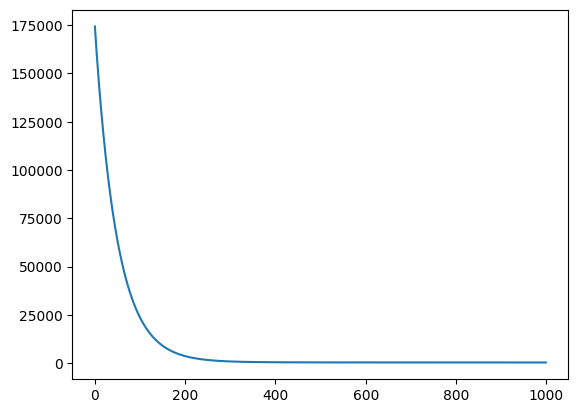

In [69]:
plt.plot(np.arange(0,1000),model.cost_history)

In [70]:
model.cost_history[-1]

310.15574885873826

In [71]:
reg = LinearRegression()


In [72]:
reg.fit(X_train,Y_train)


LinearRegression()

In [75]:
reg.intercept_

587.443120769083

In [76]:
model.b

586.9072080318866

In [77]:
model.W

array([ 5.76666459e+00,  1.53443425e+00, -8.67931325e+00,  1.64322579e+00,
       -4.53011377e+01, -4.40881326e+00, -2.65717172e+00, -1.63111155e+00,
        1.53893410e+00,  1.79898292e+00, -4.67931030e-01, -6.79541165e-01,
        2.67483310e+00,  2.70007061e+00,  3.84214310e-01, -1.62146303e+00,
        6.82415951e-01, -2.72555129e+00,  2.72102165e+00,  2.17872334e+00,
       -8.27711350e+00, -1.18123111e+00, -9.01332530e-01,  4.11943378e-01,
       -4.98120136e+00,  1.23320337e+00, -1.08960827e+00,  1.63002776e+00,
       -6.94545986e-01,  8.49767678e-01,  3.41495356e+00,  1.66153949e+00,
        4.00920688e-01, -8.36884758e+00,  4.21648658e+00,  9.01252422e-01,
       -7.37982946e-01, -2.31329681e+00, -2.05397585e+00, -9.93790536e-01,
       -1.02518463e-01,  4.51489119e+00,  2.72516451e+00, -5.25006001e-01,
        1.00538482e+00, -7.27161197e-01, -2.45663422e+00, -1.56606791e+00,
        3.19560708e-01,  3.19275512e-01, -5.53358554e-01,  3.13480469e+00,
       -2.41758458e+00, -

In [78]:
reg.coef_

array([ 2.06966350e+01,  4.29036856e+00, -7.26010818e-01, -1.43344219e+00,
       -5.47987353e+01,  3.79693772e+00,  1.47291604e+02, -1.67100911e+02,
        3.17835140e-01,  3.93838139e+00, -1.55534015e+00, -8.92012113e-02,
        2.27663106e+02, -1.93080545e+02,  2.21372417e-01,  2.10554112e+00,
       -1.87946391e+00, -2.19355483e+00,  2.77444909e+02, -2.57644535e+02,
       -5.57653479e+00, -1.15233251e+00, -2.92029634e+00,  7.45405314e-01,
       -4.48906410e+00, -6.50179734e-01, -7.17782894e-01,  4.81425054e+00,
       -3.42443013e+00,  1.13638935e+00,  1.30615203e+02, -1.06227366e+02,
        1.95824972e+00, -7.13010083e+00,  6.05173847e+00,  1.11412074e+00,
        4.57744776e+02, -3.82657084e+02, -9.36517947e-01,  2.20584983e+00,
        1.30661628e+01,  5.78995896e+00,  1.27432545e+02, -1.21231691e+02,
        2.23969791e+00, -1.37155860e+00, -6.92723414e+00, -2.78487490e+00,
       -1.20224263e+04,  1.20980555e+04, -9.38074163e-01,  5.38783625e+00,
       -2.75944206e+00, -

In [79]:
reg_pred=reg.predict(X_test)

In [80]:
model_pred=model.predict(X_test)

In [83]:
r2_score(Y_test,reg_pred)

0.7679518026079111

In [84]:
r2_score(Y_test,model_pred)

0.7779461110912965

In [86]:
residual = Y_test-model_pred

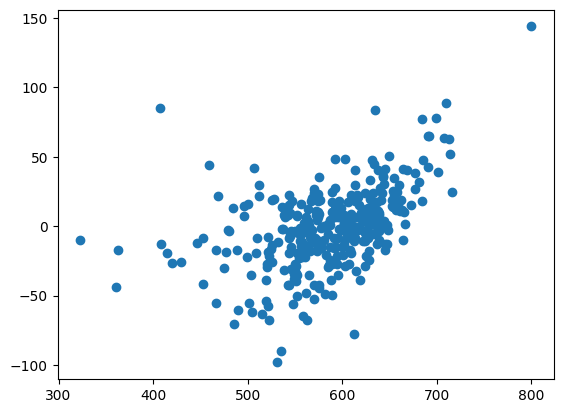

In [87]:
plt.scatter(Y_test, residual)

In [116]:
model1= logistic.Logistic_Regression(learning_rate=0.1, iterations=10000, lambda_=1)

In [117]:
model1.fit(X_train,Y_train)

In [122]:
y = model1.predict(X_test)

In [123]:
confusion_matrix(Y_test,y)

array([[118, 127],
       [ 27,  62]])

In [101]:
log= LogisticRegression()


In [102]:
log.fit(X_train,Y_train)

/home/lenizio/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [104]:
log.intercept_


array([-1.17924794])

In [106]:
model1.b

-1.1788116520121752

In [107]:
y_=log.predict(X_test)

In [120]:
confusion_matrix(Y_test,y_)

array([[223,  22],
       [ 71,  18]])

In [121]:
confusion_matrix(Y_test,y)

array([[118, 127],
       [ 27,  62]])

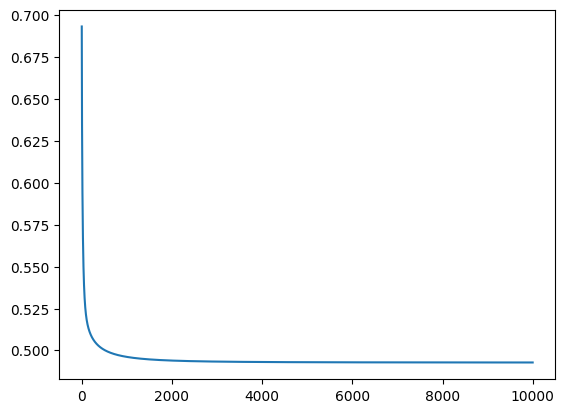

In [110]:
plt.plot(np.arange(0,10000),model1.cost_history)

In [14]:
model= logistic.Logistic_Regression(learning_rate=0.1, iterations=10000, lambda_=1)

In [15]:
model.fit(X_train,Y_train)

In [16]:
y= model.predict(X_test)

In [17]:
confusion_matrix(Y_test,y)

array([[222,  23],
       [ 71,  18]])

In [18]:
log= LogisticRegression()
log.fit(X_train,Y_train)

/home/lenizio/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
y_ =log.predict(X_test)

In [20]:
confusion_matrix(Y_test,y_)

array([[223,  22],
       [ 71,  18]])

In [21]:
confusion_matrix(Y_test,y)

array([[222,  23],
       [ 71,  18]])